# Part 1 - Linear Regression and the Limits of Linear Regression

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [53]:
#1. Import "part_conditions.csv"

df = pd.read_csv("part_conditions.csv")

In [54]:
df.head()

,unit_number,cycle_number,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [86]:
df.groupby("unit_number") ["cycle_number"].max()

unit_number
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: cycle_number, Length: 100, dtype: int64

In [88]:
df["cycle_number"]

0          1
1          2
2          3
3          4
4          5
        ... 
20626    196
20627    197
20628    198
20629    199
20630    200
Name: cycle_number, Length: 20631, dtype: int64

In [83]:
df["cycle_number"].mean()

108.80786195530997

In [58]:
#2. The minimum it took an engine to fail is 156, the max is 362 in engine 69, the average number of cycles is around 108.

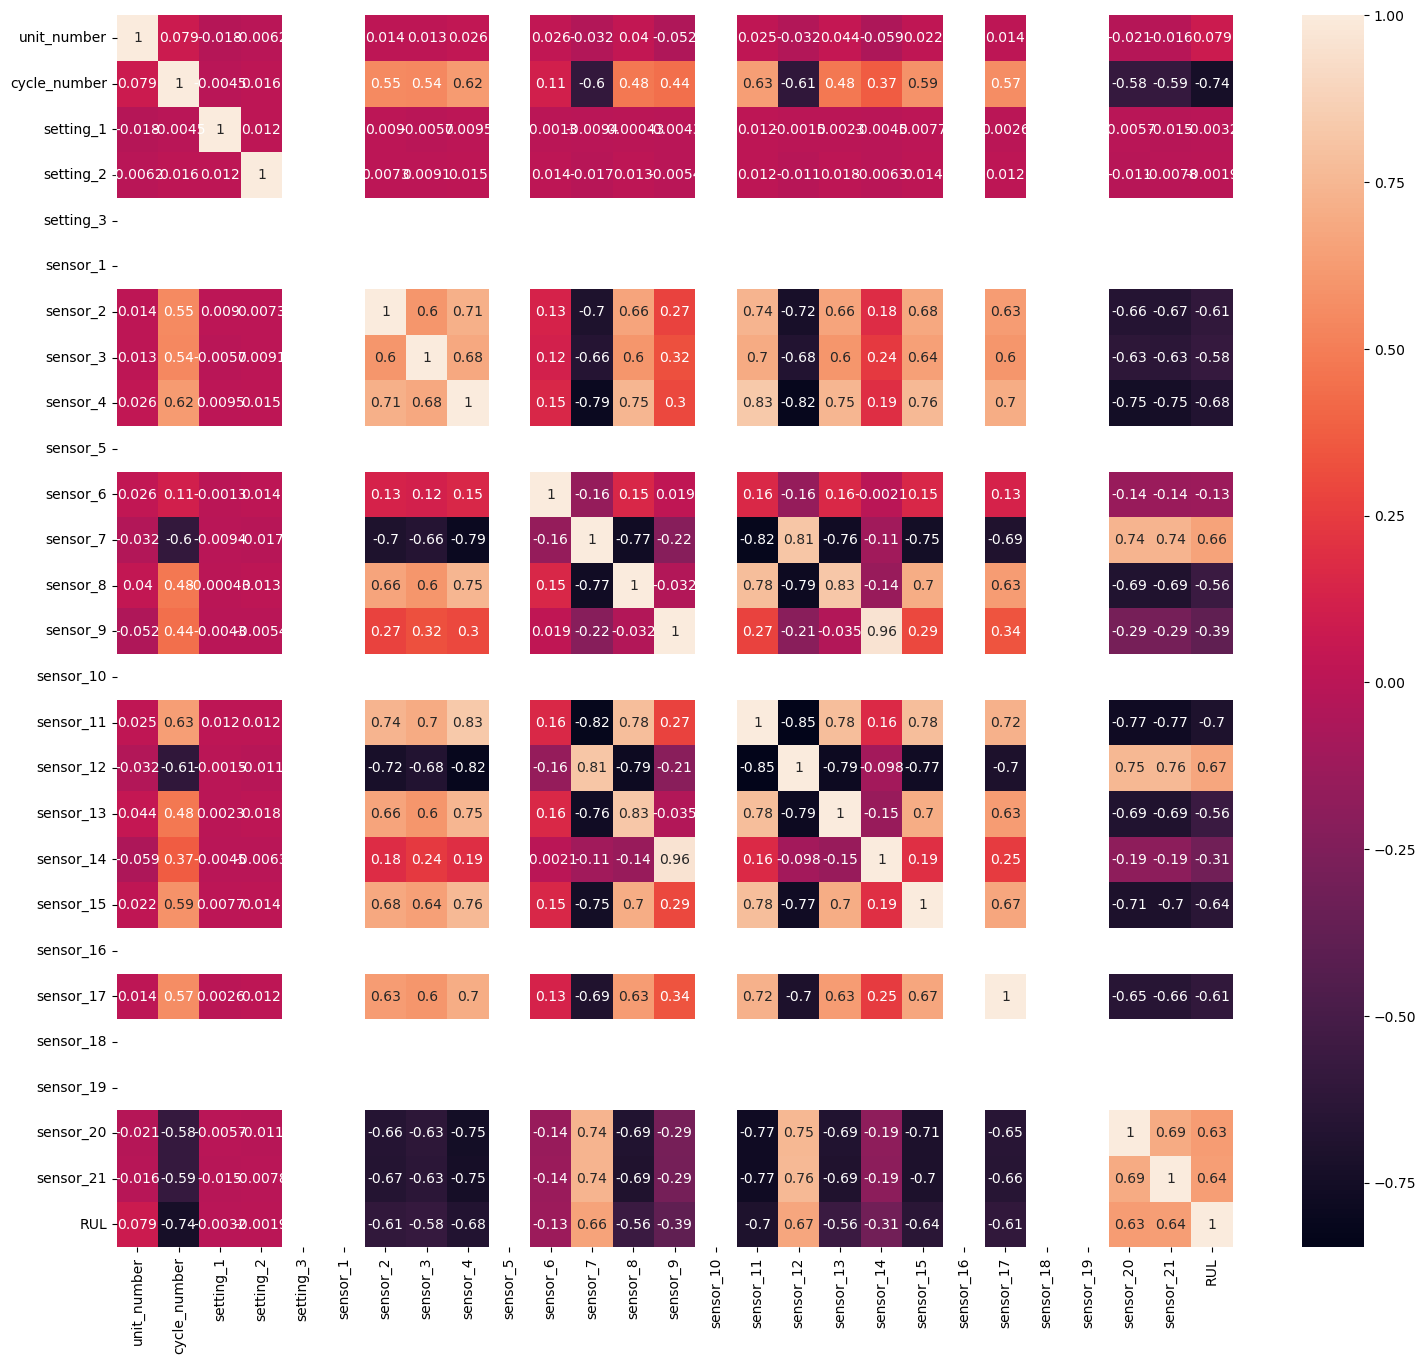

In [59]:
#3a. Which features have a strong correlation with RUL. 

fig = plt.figure(figsize = (18,16))
sns.heatmap(df.corr(), annot = True)
plt.show()

# "Cycle_number" and some of the sensors (7,11,20,21) have positive and negative correlations with the RUL feature.

In [60]:
#3b. NaN vaues for certain correlational values.
# There are NaN values within the heatmap because they could have undefined denominators since the correlational coefficient is basically calulated as a fraction.

In [61]:
#3c. Drop the columns that return NaN
df.drop(["setting_3", "sensor_1",  "sensor_5",  "sensor_10",  "sensor_16",  "sensor_18",
         "sensor_19"], axis = 1)

# It is reasonable to drop them as they all returned the same values and went unchanged during the dataset.

,unit_number,cycle_number,setting_1,setting_2,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


In [89]:
#4a. Build the Linear Regression model

x = df.drop(["unit_number","cycle_number", "RUL"], axis = 1)
y = df["RUL"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LinearRegression()
model.fit(x_train, y_train)
ypred = model.predict(x_test)

In [96]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.5777136343248812
0.5832782760559828


In [98]:
print(r2_score(y_test, ypred))

# These scores were given because the data was scaled which made the training and test data have similar values.

0.5832782760559828


Text(0, 0.5, 'Residual')

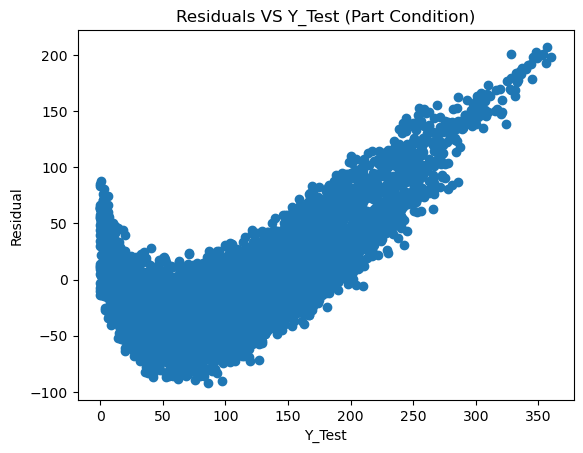

In [97]:
#4b. Residuals
Resi = (y_test - ypred)

plt.scatter(y_test, Resi)

plt.title("Residuals VS Y_Test (Part Condition)")
plt.xlabel("Y_Test")
plt.ylabel("Residual")

# The Residuals versus Y-Test plot shown below seem to be clustered together. 
# There can be a line of best fit drawn which would be extremely accurate and can be used for future predictions.

In [66]:
#4c

# This model is being used to predict how many cycles a mechanical unit can endure/last before eventually failure. 
# This can be used within the real world to predict how failure analysis can be applied to airplane parts or other mechanical instruments being used for engineering purposes.
# The input values being used are the different conditions (sensors) being applied to the parts and RUL (Remaining Useful Life) is being predicted.

In [101]:

#5a. RFE Raning
from sklearn.feature_selection import RFE

rfe = RFE(estimator = LinearRegression() , n_features_to_select = 1)
fit = rfe.fit(x_train, y_train)

print(fit.n_features_)
print(fit.ranking_)

1
[16 17 24 23 11 12  4 18 14  5 15  2 19  1  3 13  9  6 20 10 21 22  8  7]


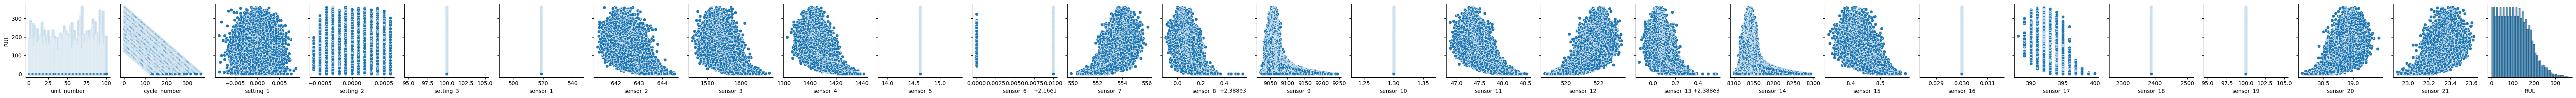

In [68]:
#5b. 
sns.pairplot(data=df, y_vars=['RUL'])

# The three worst predictors would be setting 1, 2, and sensor 6 as they all have their data points in assymetrical shapes.
# This shows that these three features have no major bearings on predicting RUL.

In [106]:
#6a. I did not know how to plot the sensors and RUL 
sns.lineplot(x = "sensor_1", y = "RUL")

plt.title("RUL VS Sensors (Part Condition)")
plt.xlabel("Sensors")
plt.ylabel("RUL")

ValueError: Could not interpret value `sensor_1` for parameter `x`

In [107]:
#6b. 

x = df.drop(["unit_number","cycle_number", "RUL"], axis = 1)
y = df["RUL"]
y.clip(upper=156)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LinearRegression()
model.fit(x_train, y_train)
ypred = model.predict(x_test)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.5819253043517079
0.5734121561537762


Text(0, 0.5, 'Residual')

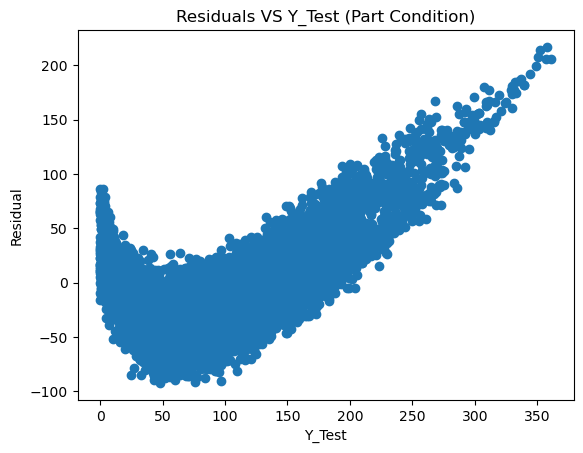

In [108]:
Resi = (y_test - ypred)

plt.scatter(y_test, Resi)

plt.title("Residuals VS Y_Test (Part Condition)")
plt.xlabel("Y_Test")
plt.ylabel("Residual")

# The values and Residual plot do not look all that different probably because I did them incorrectly.

# Part 2 – Logistic Regression and Regularization 

In [114]:
#1. Import defects.csv
df2 = pd.read_csv("defects.csv")

In [115]:
df2.head()

,Unnamed: 0,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,fault_type
0,0,42,50,270900,270944,267,17,44,24220,76,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,1,645,651,2538079,2538108,108,10,30,11397,84,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,2,829,835,1553913,1553931,71,8,19,7972,99,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,3,853,860,369370,369415,176,13,45,18996,99,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,4,1289,1306,498078,498335,2409,60,260,246930,37,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


In [116]:
df2.shape

(1840, 29)

In [117]:
#2. Distribution of fault type
df2["fault_type"].value_counts()

Other_Faults    628
Bumps           385
K_Scatch        376
Z_Scratch       180
Pastry          152
Stains           68
Dirtiness        51
Name: fault_type, dtype: int64

In [121]:
#3a. 
from sklearn.linear_model import LogisticRegression
x = df2.drop(["Unnamed: 0", "fault_type"], axis = 1)
y = df2["fault_type"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

model2 = LogisticRegression()

model2.fit(x_train, y_train)

y_pred = model2.predict(x_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.4782608695652174


C:\Users\Usama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [124]:
y_pred

array(['Bumps', 'Other_Faults', 'Other_Faults', 'Other_Faults',
       'K_Scatch', 'Bumps', 'Bumps', 'Other_Faults', 'K_Scatch',
       'Other_Faults', 'K_Scatch', 'Other_Faults', 'Bumps', 'Bumps',
       'Bumps', 'Bumps', 'K_Scatch', 'Other_Faults', 'Bumps',
       'Other_Faults', 'Other_Faults', 'K_Scatch', 'Other_Faults',
       'Other_Faults', 'K_Scatch', 'Bumps', 'Other_Faults',
       'Other_Faults', 'K_Scatch', 'Other_Faults', 'Bumps',
       'Other_Faults', 'Bumps', 'Other_Faults', 'K_Scatch', 'K_Scatch',
       'Bumps', 'Other_Faults', 'Other_Faults', 'K_Scatch',
       'Other_Faults', 'K_Scatch', 'Other_Faults', 'K_Scatch',
       'Other_Faults', 'Bumps', 'Bumps', 'K_Scatch', 'Bumps', 'Bumps',
       'Bumps', 'Other_Faults', 'K_Scatch', 'K_Scatch', 'K_Scatch',
       'Other_Faults', 'K_Scatch', 'K_Scatch', 'K_Scatch', 'Bumps',
       'Other_Faults', 'Bumps', 'K_Scatch', 'Other_Faults', 'K_Scatch',
       'Other_Faults', 'K_Scatch', 'Bumps', 'Other_Faults', 'Bumps',
       'Ot

In [125]:
y_test

1666    Other_Faults
1280    Other_Faults
783        Dirtiness
921            Bumps
1597    Other_Faults
            ...     
1058           Bumps
129           Pastry
1810    Other_Faults
1681    Other_Faults
1207           Bumps
Name: fault_type, Length: 552, dtype: object

In [127]:
#3b. Confusion Matrix
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

# Only 264 predictions were made correctly (True Negatice/Positive)
# The fouth row 'Z_Scratch'?? shows the highest amount of datapoints being inaccurately classified and is the most important in that regard.
# Since the accuracy of our model is only 47.8%, this confusion matrix makes sense.

[[ 65   0   4  47   0   0   0]
 [  8   0   1  10   0   0   0]
 [  4   0  88  25   0   0   0]
 [ 57   0  20 111   0   0   0]
 [ 16   0   6  21   0   0   0]
 [ 20   0   0   2   0   0   0]
 [ 15   0   4  28   0   0   0]]


In [128]:
#3c. 
model3 = LogisticRegression(max_iter = 200)

model3.fit(x_train, y_train)

y_pred = model3.predict(x_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

# Accuracy has decreased.

Accuracy:  0.46195652173913043


C:\Users\Usama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [129]:
model4 = LogisticRegression(max_iter = 5000)

model4.fit(x_train, y_train)

y_pred = model4.predict(x_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

# Accuracy has increased.

Accuracy:  0.5344202898550725


C:\Users\Usama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [135]:
# Due to the number of iterations increasing, it can be assumed that machine learning's predictive power can be improved because it has more time to learn.
# Accuracy is increasing with each iteration.

In [133]:
#4a. 
x = df2.drop(["Unnamed: 0", "fault_type"], axis = 1)
y = df2["fault_type"]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model5 = LogisticRegression()

model5.fit(x_train_scaled, y_train)

y_pred = model5.predict(x_test_scaled)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7010869565217391


C:\Users\Usama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [134]:
#4b.
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

# The number of correct predictions are 387 which is a significant increase over part 3.
# The accuracy has also greatly increased due to the help of scaling.
# The purpose of scaling is to standardize the dataframe before applying it to regression as it can help the machine predict more easily since there will be less variance in the dataset.

[[ 65   1   1  40   3   1   5]
 [  1  13   0   5   0   0   0]
 [  1   0 108   6   0   2   0]
 [ 31   2   7 120  13   3  12]
 [  8   1   2  14  18   0   0]
 [  0   0   0   0   0  22   0]
 [  1   0   2   3   0   0  41]]


In [136]:
model6 = LogisticRegression(max_iter = 10000, penalty = "l2", C = 0.1)

model6.fit(x_train_scaled, y_train)

y_pred = model6.predict(x_test_scaled)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7028985507246377


In [137]:
model7 = LogisticRegression(max_iter = 10000, penalty = "l2", C = 1)

model7.fit(x_train_scaled, y_train)

y_pred = model7.predict(x_test_scaled)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6992753623188406


In [138]:
model8 = LogisticRegression(max_iter = 10000, penalty = "l2", C = 10)

model8.fit(x_train_scaled, y_train)

y_pred = model8.predict(x_test_scaled)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7047101449275363


In [139]:
model9 = LogisticRegression(max_iter = 10000, penalty = "l2", C = 100)

model9.fit(x_train_scaled, y_train)

y_pred = model9.predict(x_test_scaled)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7119565217391305


In [140]:
modelX = LogisticRegression(max_iter = 10000, penalty = "l2", C = 1000)

modelX.fit(x_train_scaled, y_train)

y_pred = modelX.predict(x_test_scaled)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7083333333333334


In [141]:
modelX1 = LogisticRegression(max_iter = 10000, penalty = "l2", C = 10000)

modelX1.fit(x_train_scaled, y_train)

y_pred = modelX1.predict(x_test_scaled)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7083333333333334


In [ ]:
# The optimal c value is 100 although I am not sure if that is an error as the accuracy is supposed to increase alongside a higher c value.
# All the models did converge and there were no iterations errors. 
# If anyone wanted the best regularization for their model then a high c value with enough iterations would be the best way to proceed.
# Model 9 had the highest accuracy, but at a certain point it would not matter how high of a c value you decide to use.